In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 21 15:52:58 2017

@author: meenakshi
"""

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing/"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

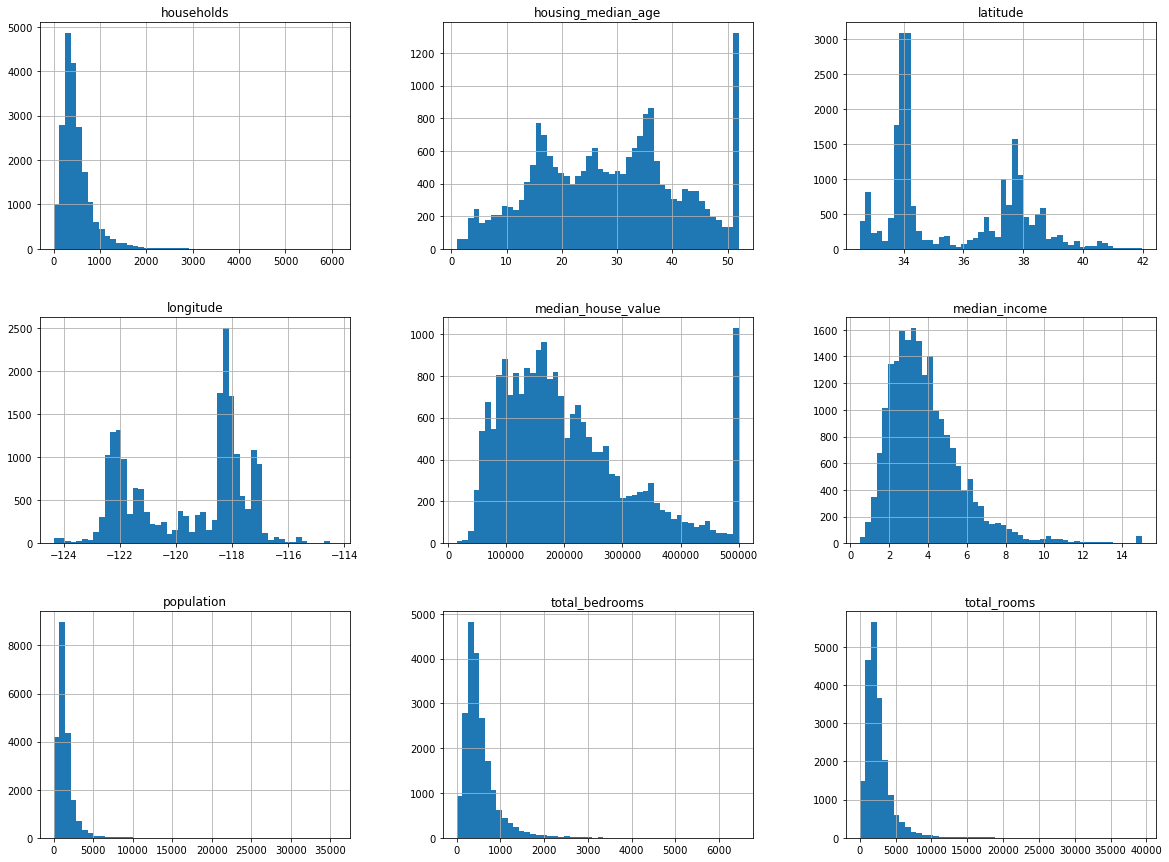

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 21 16:14:51 2017

@author: meenakshi
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hashlib
from sklearn.model_selection import train_test_split

HOUSING_PATH = "datasets/housing/"

housing = pd.read_csv(HOUSING_PATH + "housing.csv")
housing.hist(bins = 50, figsize = (20,15))
plt.show()

def split_train_test(data, test_ratio):
    #np.random.seed(42) to fix the permutation for different runs
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    test_ind = shuffled_indices[:test_size]
    train_ind = shuffled_indices[test_size:]
    return data.iloc[test_ind], data.iloc[train_ind]
    
test_set, train_set = split_train_test(housing, 0.2)

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256*test_ratio
    
def test_train_split_hash(data, test_ratio, id_col, hash = hashlib.md5):
    ids = data[id_col]
    test_set_id = ids.apply(lambda idval:test_set_check(idval, test_ratio, hash))
    return data.loc[test_set_id], data.loc[~test_set_id]
    
housing.reset_index(inplace = True)

test_set, train_set = test_train_split_hash(housing, 0.2, "index")





In [10]:
housing['median_income_binned'] = np.ceil(housing['median_income']/1.5)
housing.columns

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_income_binned'],
      dtype='object')

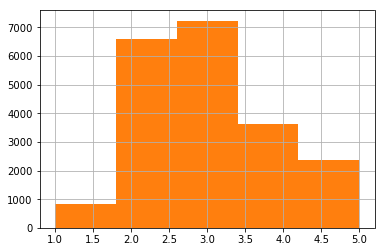

In [12]:
housing['median_income_binned'].where(housing['median_income_binned'] < 5, 5.0, inplace = True)
housing['median_income_binned'].hist(bins = 5)
plt.show()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [19]:
for train_idx, test_idx in split.split(housing, housing['median_income_binned']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [20]:
housing["median_income_binned"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: median_income_binned, dtype: float64

In [21]:
strat_test_set["median_income_binned"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: median_income_binned, dtype: float64

In [24]:
strat_train_set.drop("median_income_binned", axis = 1, inplace = True)
strat_test_set.drop("median_income_binned", axis = 1, inplace = True)

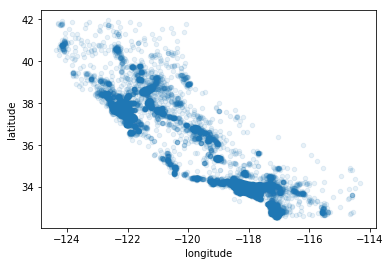

In [27]:
housing = strat_train_set.copy()
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', alpha = 0.1)
plt.show()

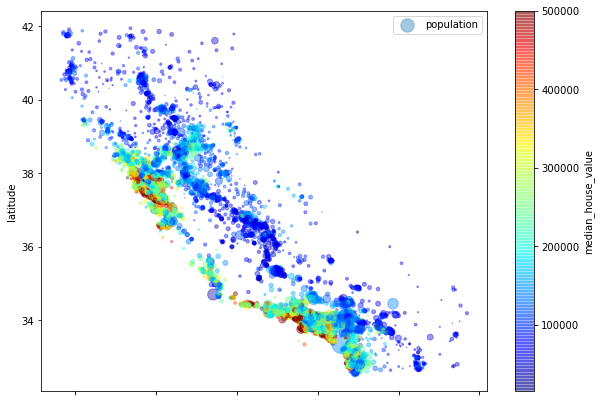

In [32]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = housing['population']/100, label = 'population', figsize = (10, 7), c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)
plt.show()

In [34]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
index                 0.067723
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64